## Graduational rotational internship program GRIP2021

## Name:S.Sandhiya

## Data Science and Business Analytics

## Task 3:Exploratory data Analysis -Retail to find out weak areas where he can work to make more profit

In [1]:
#Importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data =pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
data.duplicated().sum()

17

In [9]:
data.drop_duplicates(inplace=True) ##dropping the duplicated values

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [14]:
##here postal code is not a useful column so hence it will drop it
data.drop(['Postal Code'], axis=1,inplace=True)

In [15]:
data.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### as we see no null values present tin the dataset

In [16]:
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


#### Here thecoorelation is done in 5 columns so remaining columns has nonnumerical values

<AxesSubplot:>

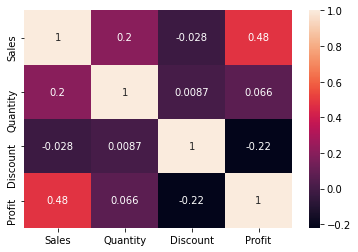

In [17]:
sns.heatmap(data.corr(), annot=True)

#### 1 --> Positive   -0.5 --> Negative

In [18]:
data['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

([<matplotlib.patches.Wedge at 0x229a097ff70>,
 [Text(-0.32962457301025583, 1.0494511140914602, 'Standard Class'),
  Text(-0.3775057080207549, -1.0331938058330337, 'Second Class'),
  Text(0.7461624595548612, -0.8082336196614445, 'First Class'),
  Text(1.0840189091308712, -0.18682345850218163, 'Same Day')],
 [Text(-0.1797952216419577, 0.5724278804135237, '59.7%'),
  Text(-0.2059122043749572, -0.5635602577271093, '19.5%'),
  Text(0.4069977052117424, -0.4408547016335151, '15.4%'),
  Text(0.5912830413441115, -0.1019037046375536, '5.4%')])

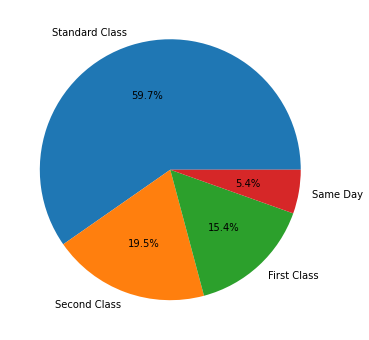

In [25]:
plt.figure(figsize=(6,6))
plt.pie(data['Ship Mode'].value_counts(), labels=data['Ship Mode'].value_counts().index, autopct="%1.1f%%")


<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

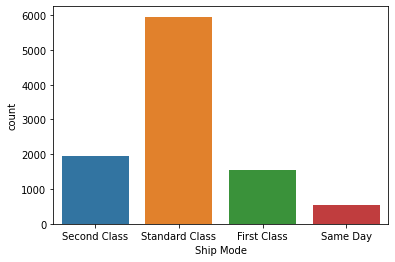

In [28]:
sns.countplot(x=data['Ship Mode'])

### In Ship most of them  are reffering Standard Class

In [30]:
data['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

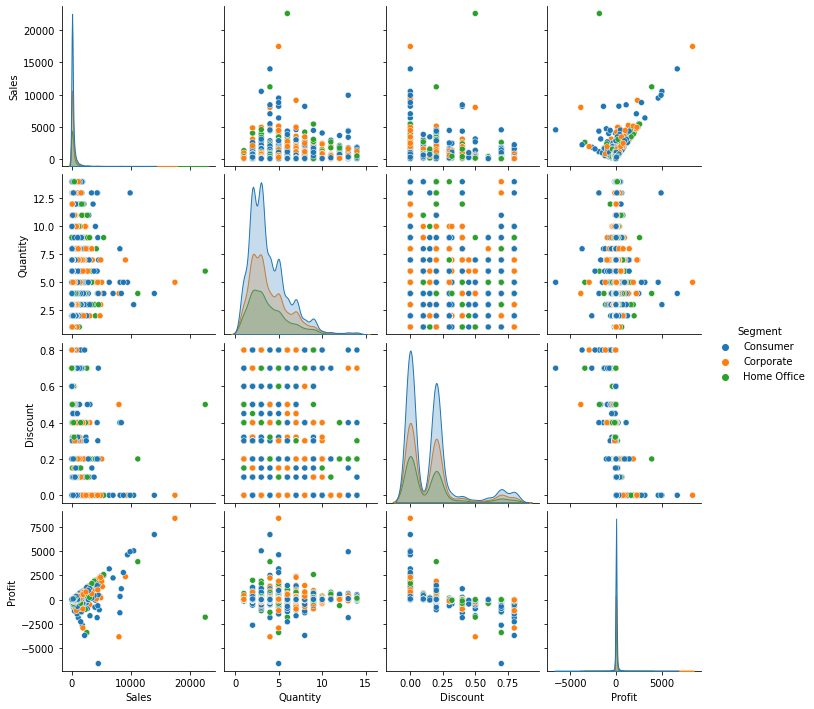

In [31]:
sns.pairplot(data,hue='Segment')

#### here we can see in segement.profit and sales has  some positive coorealtion

In [32]:
data['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

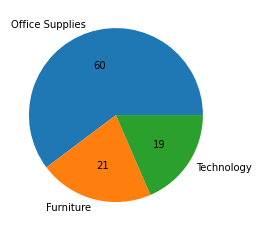

<AxesSubplot:xlabel='Category', ylabel='count'>

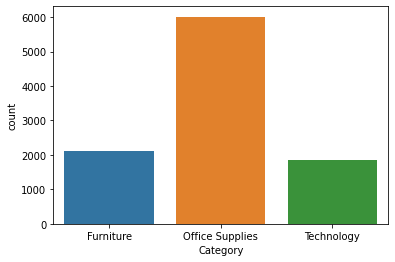

In [37]:
plt.pie(data['Category'].value_counts(),labels=data['Category'].value_counts().index,autopct="%.0f")
plt.show()
sns.countplot(x="Category",data=data)

#### Here Office Supplies category has more furnitures and Technology

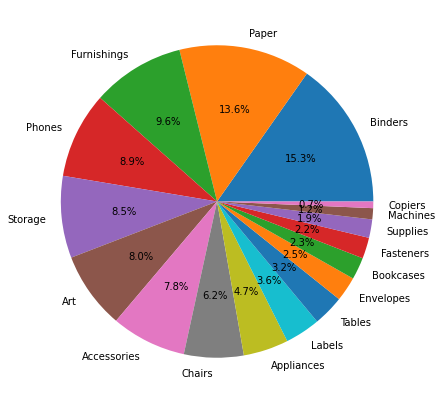

In [43]:
plt.figure(figsize=(7,10))
plt.pie(data['Sub-Category'].value_counts(),labels=data['Sub-Category'].value_counts().index, autopct='%1.1f%%')
plt.show()

<AxesSubplot:xlabel='State'>

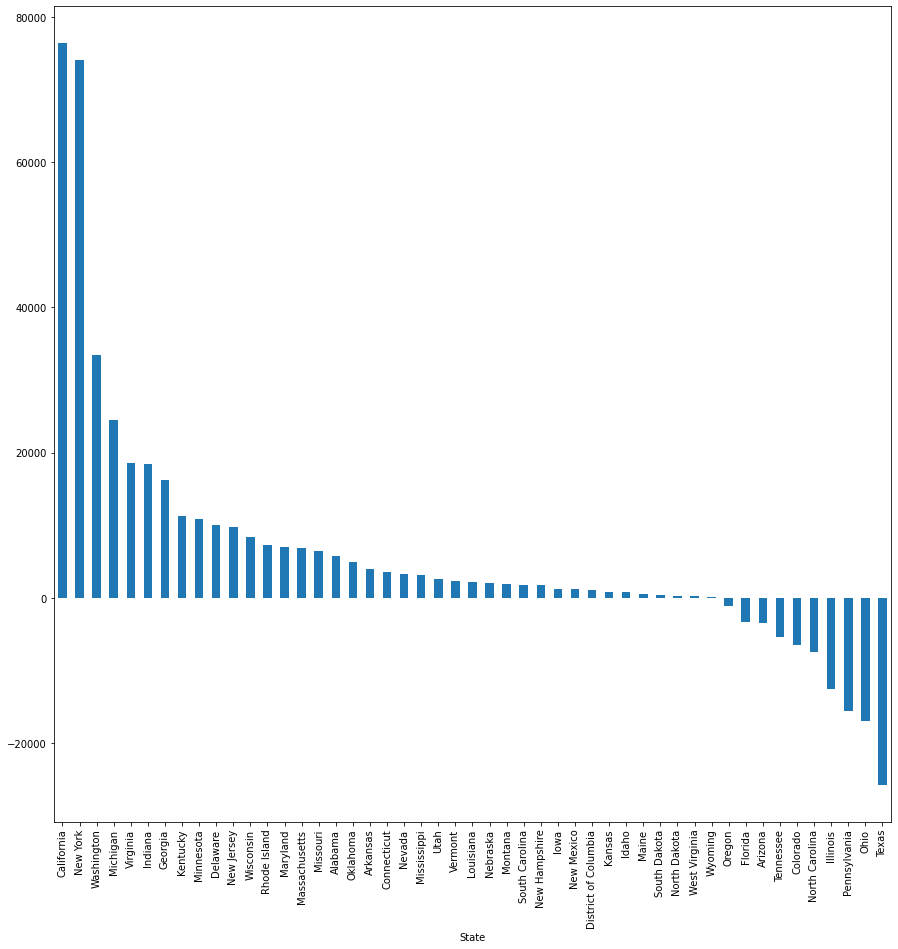

In [44]:
plt.figure(figsize=(15,15))
stpr=data.groupby(['State'])['Profit'].sum().nlargest(50)
stpr.plot.bar()

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

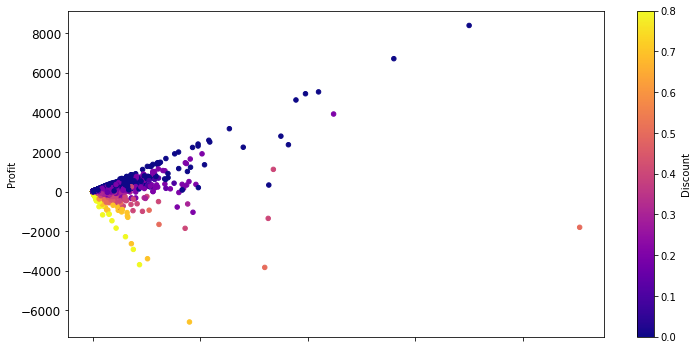

In [45]:
data.plot(kind="scatter",figsize=(12,6),x="Sales",y="Profit",c="Discount",s=20,fontsize=12,colormap='plasma')

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

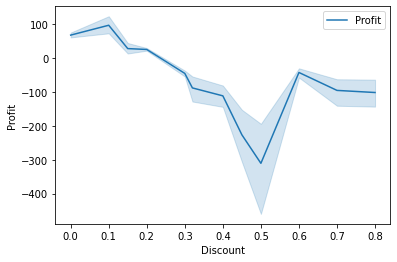

In [48]:
sns.lineplot(x="Discount",y="Profit",label="Profit",data=data)

### We can clearly observe that the discount has a negative relation with profit i.e. as the profit is increasing the Profit generated is decreased.

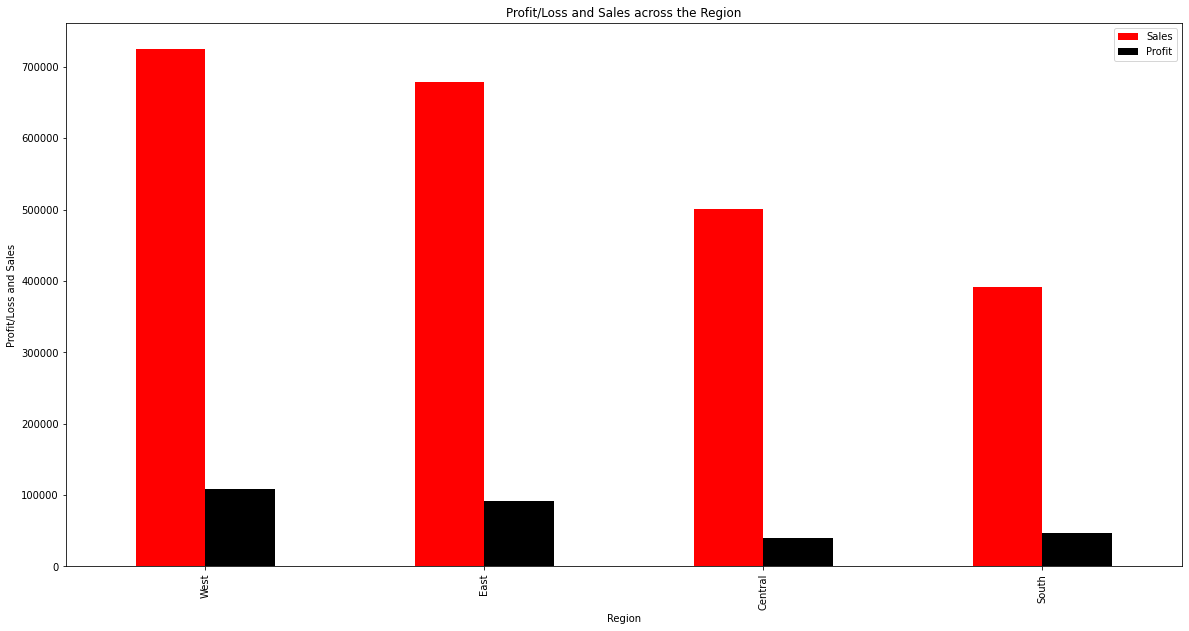

In [49]:
pls=data.groupby('Region')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
pls[:].plot.bar(color=['red','black'],figsize=(20,10))
plt.title('Profit/Loss and Sales across the Region')
plt.xlabel('Region')
plt.ylabel('Profit/Loss and Sales')
plt.show()


### More the Discount More the Sales but lesser the Profits

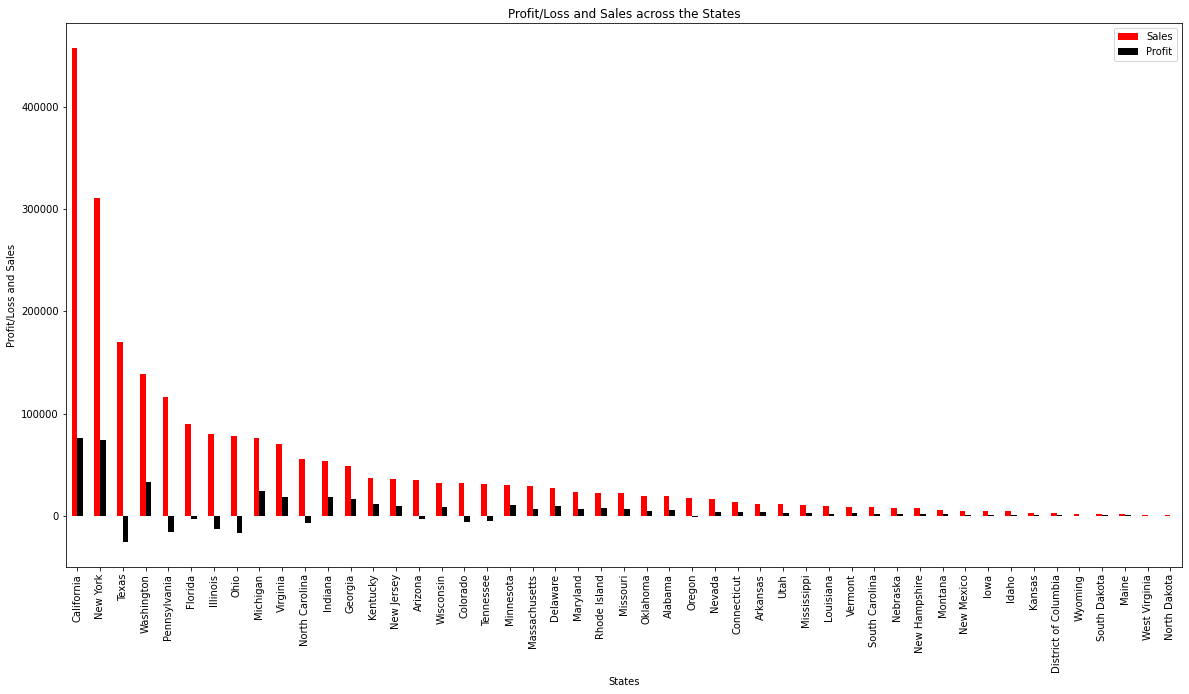

In [50]:

pls=data.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
pls[:].plot.bar(color=['red','black'],figsize=(20,10))
plt.title('Profit/Loss and Sales across the States')
plt.xlabel('States')
plt.ylabel('Profit/Loss and Sales')
plt.show()

#### CONCLUSIONS
Work more on california and New York as they are places of Maximum sales
Decrease Discounts in Southern Region to increase sales
Reduce sales of furniture as it has very less profit compared to sales.
The Profit generated by office supplies category is more, but the sales for office suppliers are less. So, we have to work on increasing the sales for office supplies category